# CART - Classification and Regression Tree (Sınıflandırma ve Regresyon Ağacı)

- **Amaç**, veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.
- Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.


**Gerekli Kütüphaneler** 

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import  neighbors
from sklearn.svm import SVR

In [135]:
# Uyarı Mesajları ile Karşılaşmamak için bu kütüphaneyi kullanıyoruz.
from warnings import filterwarnings
filterwarnings("ignore")

# CART - Classification and Regression Tree - Model ve Tahmin İşlemleri 

In [136]:
df = pd.read_csv("./Hitters.csv")
# bu csv dosyasının içerisinde eksik gözlemleri(NA) çıkardık.
df = df.dropna()

# Veri seti içerisindeki kategorik değişkenleri dummy değişkenlere çeviriyoruz.
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

# bağımlı değişken
y = df[["Salary"]]

# Veri Setinin içerisinden Bağımlı Değişkeni ve Kategorik değişkenlerin ilk hallerini dışarı bırakıyoruz.
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

# dms ile X_ birleştirip(concat) bağımsız değişken oluşturduk.
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)

# train ve test setlerimizi oluşturuyoruz.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state= 42) 

In [137]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

**Model**

In [138]:
cart_model = DecisionTreeRegressor(max_leaf_nodes= 3)

In [139]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

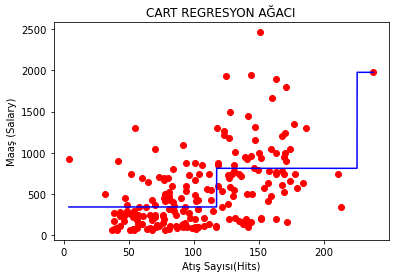

In [140]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train,y_train, color = 'r')
plt.plot(X_grid, cart_model.predict(X_grid), color ='blue')
plt.title('CART REGRESYON AĞACI')
plt.xlabel('Atış Sayısı(Hits)')
plt.ylabel('Maaş (Salary)');

**Tahmin**

In [141]:
# Tek değişkenli tahmin
cart_model.predict(X_test)[0:5]

array([813.0988    , 813.0988    , 813.0988    , 345.20115517,
       345.20115517])

In [142]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

460.0663148428844

In [143]:
# tüm değişkenlerle tahmin 

In [144]:
df = pd.read_csv("./Hitters.csv")
# bu csv dosyasının içerisinde eksik gözlemleri(NA) çıkardık.
df = df.dropna()

# Veri seti içerisindeki kategorik değişkenleri dummy değişkenlere çeviriyoruz.
dms = pd.get_dummies(df[["League","Division","NewLeague"]])

# bağımlı değişken
y = df[["Salary"]]

# Veri Setinin içerisinden Bağımlı Değişkeni ve Kategorik değişkenlerin ilk hallerini dışarı bırakıyoruz.
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

# dms ile X_ birleştirip(concat) bağımsız değişken oluşturduk.
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)

# train ve test setlerimizi oluşturuyoruz.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state= 42) 

In [145]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [146]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

477.9659682151053

# Model Tuning

In [147]:
cart_model

DecisionTreeRegressor()

In [149]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

457.0336583735084

In [150]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\halil\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "bes

In [151]:
cart_params = {"max_depth":[2,3,4,5,10,20],
              "min_samples_split": [2,10,5,30,50,100]}

In [165]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [166]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

**Final Modeli**

In [167]:
cart_model_tuned = DecisionTreeRegressor(max_depth=4, min_samples_split= 50).fit(X_train,y_train)

In [168]:
y_pred_tuned = cart_model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_tuned))

361.0876906511434